# 📊 Netflix Data Analysis 

In [6]:
import matplotlib.pyplot as plt
import pandas as pd

In [10]:
df=pd.read_csv("netflix_titles.csv")


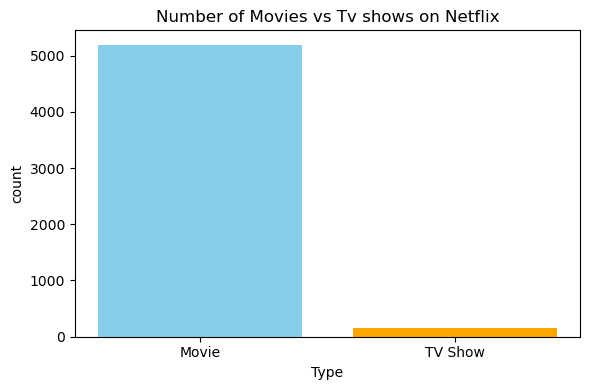

In [16]:
# clean data
df= df.dropna(subset=['type','title','director','cast','country'])

type_counts=df['type'].value_counts()

plt.figure(figsize=(6,4))

plt.bar(type_counts.index,type_counts.values,color=['skyblue','orange'])

plt.title("Number of Movies vs Tv shows on Netflix")
plt.xlabel('Type')
plt.ylabel("count")

plt.tight_layout()
plt.show()

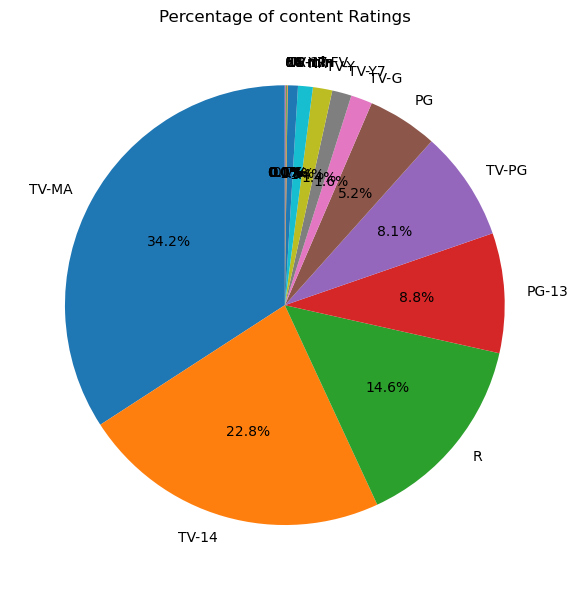

In [20]:
import matplotlib.pyplot as plt
import pandas as pd


rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%', startangle=90)

plt.title("Percentage of content Ratings")

plt.tight_layout()
plt.show()


In [44]:
movie_df = df[df['type'] == 'Movie'].copy()

# Remove 'min', drop NaN, then convert to int
movie_df['duration_int'] = (
    movie_df['duration']
    .str.replace('min', '', regex=False)
    .dropna()
    .astype(float)  # First to float
    .astype(int)    # Then to int
)


movie_df

movie_df = df[df['type'] == 'Movie'].copy()
movie_df = movie_df[movie_df['duration'].notna()]  # remove NaN rows
movie_df['duration_int'] = movie_df['duration'].str.replace('min', '', regex=False).astype(int)

print("Missing durations:", movie_df['duration'].isna().sum())


Missing durations: 0


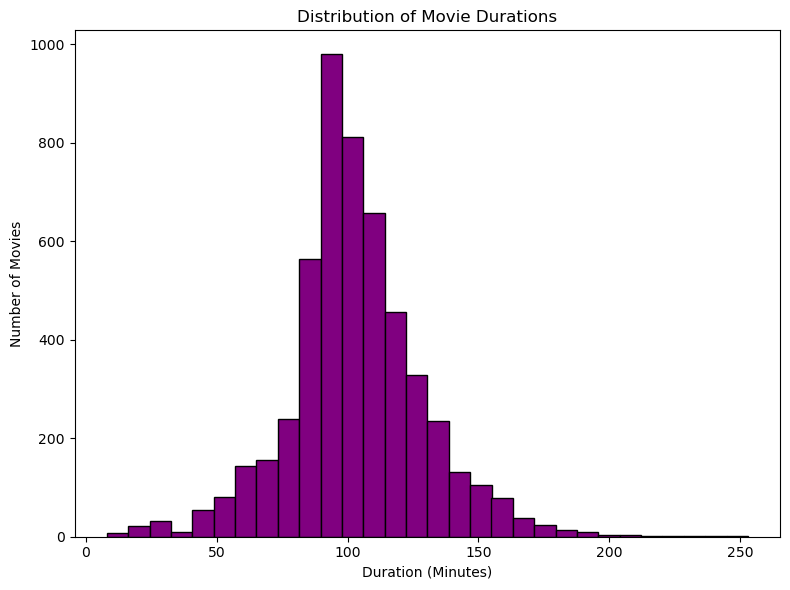

In [46]:
plt.figure(figsize=(8, 6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor='black')

plt.title("Distribution of Movie Durations")
plt.xlabel('Duration (Minutes)')
plt.ylabel("Number of Movies")

plt.tight_layout()
plt.show()


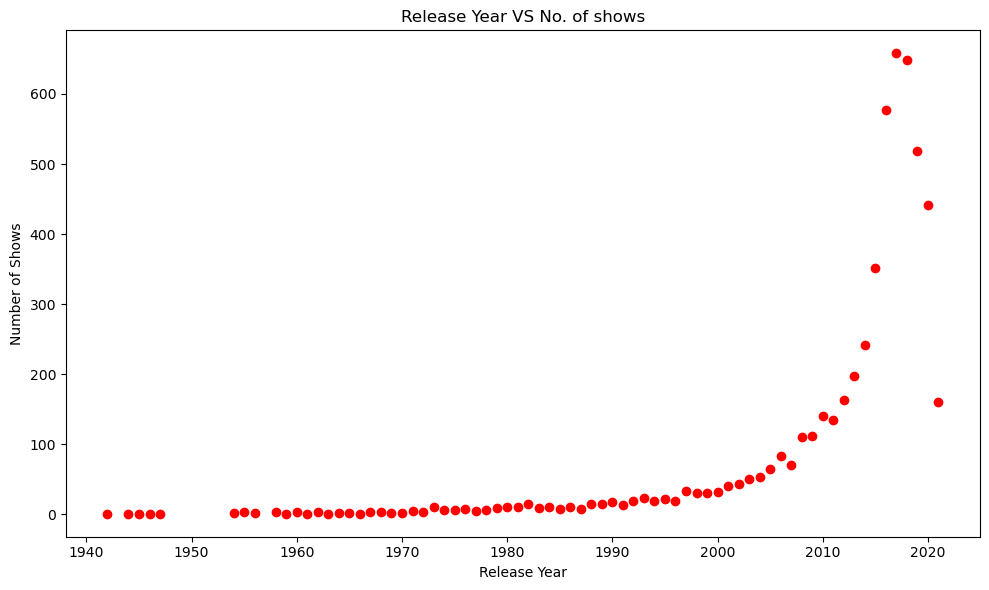

In [48]:
release_count= df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_count.index, release_count.values, color='red')

plt.title("Release Year VS No. of shows")
plt.xlabel('Release Year')
plt.ylabel("Number of Shows")

plt.tight_layout()
plt.show()


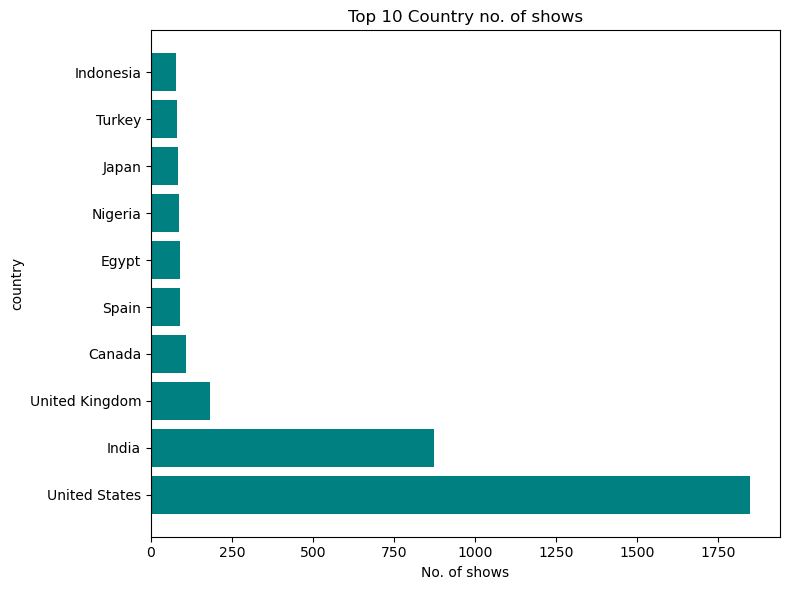

In [54]:
country_counts=df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))
plt.barh(country_counts.index, country_counts.values,color='teal')

plt.title("Top 10 Country no. of shows")
plt.xlabel('No. of shows')
plt.ylabel("country")
plt.tight_layout()
plt.show()





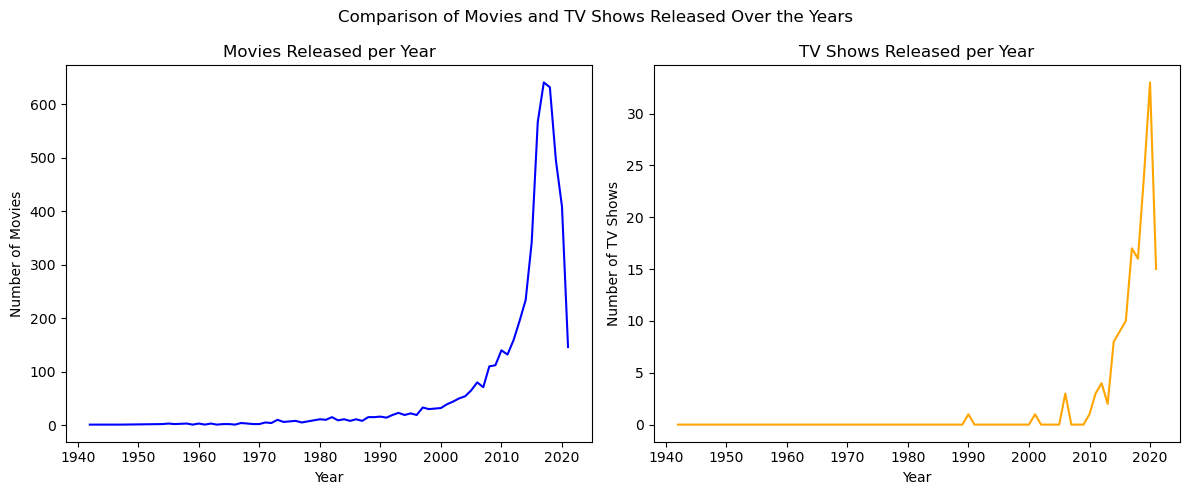

In [62]:
# Grouping data
content_by_year = df.groupby(['release_year', 'type']).size().unstack().fillna(0)

# Subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# First subplot: Movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color="blue")
ax[0].set_title('Movies Released per Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Number of Movies')

# Second subplot: TV Shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color="orange")
ax[1].set_title('TV Shows Released per Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Number of TV Shows')

# Overall Title
fig.suptitle("Comparison of Movies and TV Shows Released Over the Years")

plt.tight_layout()
plt.show()


Successful🎉 